In [1]:
# Practical 2: Batting Performance Analysis in Cricket

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme for clean visuals
sns.set(style="whitegrid")

In [3]:
# ---------------------------------------------------------------
# Step 1: Create a synthetic cricket batting dataset
# ---------------------------------------------------------------

np.random.seed(10)  # reproducibility

players = [f"Player_{i}" for i in range(1, 21)]
opponents = ["Australia", "England", "India", "Pakistan", "South Africa"]

data = {
    "Player": np.random.choice(players, 120),
    "Opponent": np.random.choice(opponents, 120),
    "Runs": np.random.randint(0, 150, 120),          # Runs scored in innings
    "Balls_Faced": np.random.randint(1, 120, 120),   # Balls faced
    "Out": np.random.choice([0,1], 120, p=[0.3, 0.7]) # 0 = Not Out, 1 = Out
}

df = pd.DataFrame(data)

In [4]:
df.head()

,Player,Opponent,Runs,Balls_Faced,Out
0,Player_10,England,13,83,0
1,Player_5,Pakistan,124,35,1
2,Player_16,Pakistan,32,12,1
3,Player_1,England,103,47,0
4,Player_18,Pakistan,20,75,0


In [5]:
# ---------------------------------------------------------------
# Step 2: Calculate Batting Metrics
# ---------------------------------------------------------------

# Batting Average = Total Runs / No. of dismissals
player_stats = df.groupby("Player").agg({
    "Runs": "sum",
    "Balls_Faced": "sum",
    "Out": "sum"  # number of times dismissed
}).reset_index()

player_stats["Batting_Average"] = player_stats["Runs"] / player_stats["Out"]
player_stats["Strike_Rate"] = (player_stats["Runs"] / player_stats["Balls_Faced"]) * 100

# Replace infinity averages due to 0 dismissals (never got out)
player_stats["Batting_Average"] = player_stats["Batting_Average"].replace(np.inf, np.nan)

print("\n🏏 Player Performance Summary:")
print(player_stats.sort_values(by="Runs", ascending=False).head())


🏏 Player Performance Summary:
       Player  Runs  Balls_Faced  Out  Batting_Average  Strike_Rate
8   Player_17   819          549    9            91.00   149.180328
3   Player_12   729          434    4           182.25   167.972350
9   Player_18   667          616    4           166.75   108.279221
10  Player_19   664          681    8            83.00    97.503671
0    Player_1   627          447    5           125.40   140.268456


In [6]:
# ---------------------------------------------------------------
# Step 3: Identify Top Batsmen
# ---------------------------------------------------------------

top_batsmen = player_stats.sort_values(
    by=["Runs","Strike_Rate","Batting_Average"], ascending=False
).head(5)

print("\n⭐ Top 5 Batsmen:")
print(top_batsmen)



⭐ Top 5 Batsmen:
       Player  Runs  Balls_Faced  Out  Batting_Average  Strike_Rate
8   Player_17   819          549    9            91.00   149.180328
3   Player_12   729          434    4           182.25   167.972350
9   Player_18   667          616    4           166.75   108.279221
10  Player_19   664          681    8            83.00    97.503671
0    Player_1   627          447    5           125.40   140.268456


In [7]:
# ---------------------------------------------------------------
# Step 4: Compare performance vs different opponents
# ---------------------------------------------------------------

opponent_stats = df.groupby(["Player","Opponent"])["Runs"].sum().reset_index()

print("\n📊 Sample Batsman vs Opponent Performance:")
print(opponent_stats.head())



📊 Sample Batsman vs Opponent Performance:
      Player      Opponent  Runs
0   Player_1     Australia    57
1   Player_1       England   117
2   Player_1      Pakistan   252
3   Player_1  South Africa   201
4  Player_10     Australia   125


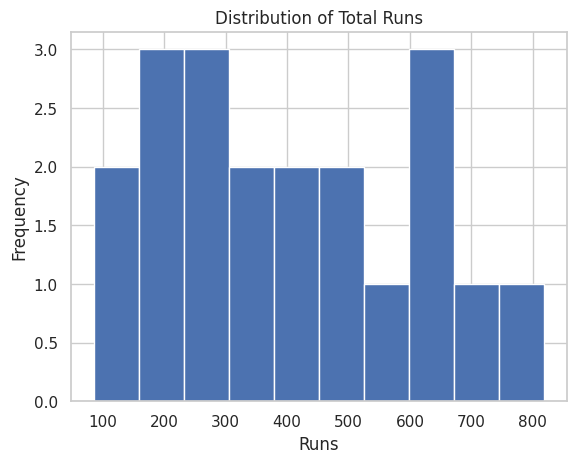

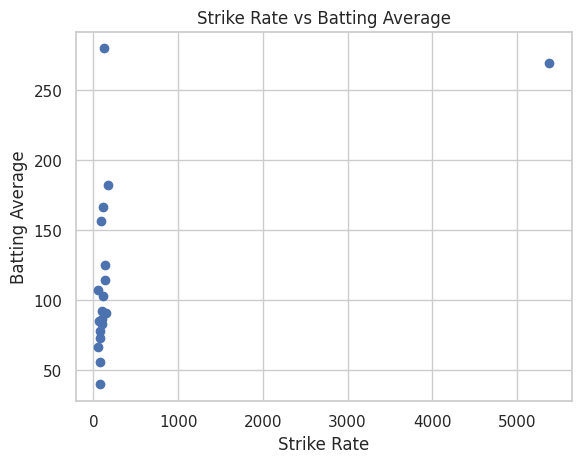

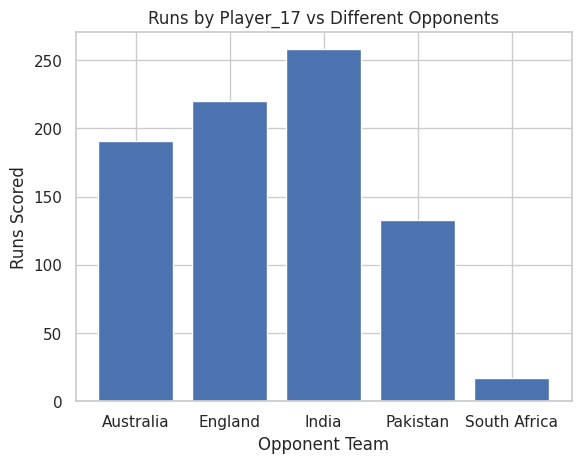

In [8]:
# ---------------------------------------------------------------
# Step 5: Visualizations
# ---------------------------------------------------------------

# Runs Distribution
plt.figure()
plt.hist(player_stats["Runs"])
plt.title("Distribution of Total Runs")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

# Strike Rate vs Batting Average
plt.figure()
plt.scatter(player_stats["Strike_Rate"], player_stats["Batting_Average"])
plt.title("Strike Rate vs Batting Average")
plt.xlabel("Strike Rate")
plt.ylabel("Batting Average")
plt.show()

# Opponent comparison for top batsman
best_player = top_batsmen["Player"].iloc[0]
player_vs_opponent = opponent_stats[opponent_stats["Player"] == best_player]

plt.figure()
plt.bar(player_vs_opponent["Opponent"], player_vs_opponent["Runs"])
plt.title(f"Runs by {best_player} vs Different Opponents")
plt.xlabel("Opponent Team")
plt.ylabel("Runs Scored")
plt.show()